In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from helpers import *
from plots import *
import datetime
import pandas as pd
from proj1_helpers import *

## Load the training data into feature matrix, class labels, and event ids:

In [20]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=True)

In [21]:
tX.shape, y.shape

((5000, 30), (5000,))

In [3]:
y=y.reshape(len(y),1)
y.shape

(250000, 1)

In [5]:
tX.shape

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ..., -999.   , -999.   ,   46.226],
       [-999.   ,  162.172,  125.953, ..., -999.   , -999.   ,   44.251],
       ..., 
       [ 105.457,   60.526,   75.839, ..., -999.   , -999.   ,   41.992],
       [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
       [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]])

In [41]:
df= pd.read_csv(DATA_TRAIN_PATH)

In the following code section, we choose how do we deal with the datas. This part is extremly important since the method we choose is going to change the predictions. We have roughly two methods to deal with outliers, we tried both and we are going to compare them.

The method function returns the matrix we are going to work with. If argument 1 is chosen, we will use the first method and with argument 2 the second method.

### First method
We remove all columns containing -999. using remove_outlier_columns function.

In [5]:
new_tX, new_mean, new_std = method(1,tX)
new_tX.shape

(5000, 20)

### Second method
We transform all the -999. values by the mean of the columns (calculated without counting the -999.)

In [6]:
mean_tX, mean_mean, mean__std = method(2,tX)
mean_tX

array([[  1.00000000e+00,   3.07797572e-01,   3.96543618e-02, ...,
          1.13700709e+00,  -2.39839608e+00,   3.98182143e-01],
       [  1.00000000e+00,   1.78768046e+00,   6.33440608e-01, ...,
         -1.02859606e-16,   4.80781369e-16,  -2.31796107e-01],
       [  1.00000000e+00,  -5.67586021e-01,  -6.41518864e-01, ...,
         -1.02859606e-16,   4.80781369e-16,  -1.08298366e-01],
       ..., 
       [  1.00000000e+00,   3.78993993e-01,  -1.22366112e+00, ...,
         -1.02859606e-16,   4.80781369e-16,   2.34160770e-01],
       [  1.00000000e+00,  -7.99685985e-01,  -1.12174093e-01, ...,
         -1.02859606e-16,   4.80781369e-16,  -4.11062512e-01],
       [  1.00000000e+00,   1.53027534e-01,  -1.31829705e+00, ...,
         -1.02859606e-16,   4.80781369e-16,  -2.25396588e-01]])

For each method 1 and 2, we will implement the 6 ML methods asked in the step 2 of the project description and will compare them.

### Third method


In [4]:
dup_tX, dup_mean, dup_std= method(3, tX)

In [5]:
dup_tX.shape

(250000, 91)

# Linear regression
### with gradient descent method

We define the parameters of the algorithm

In [10]:
max_iters = 501
gamma = 0.04
#initial_w1 = np.zeros((new_tX.shape[1], 1))
#initial_w2 = np.zeros((mean_tX.shape[1], 1))
initial_w3 = np.zeros((dup_tX.shape[1], 1))

Method 1: We remove outliers

In [47]:
start_time = datetime.datetime.now()
best_ws1= least_square_GD(y, new_tX, initial_w1, gamma,max_iters)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/500): loss=0.5
Gradient Descent(100/500): loss=0.34664069018483407
Gradient Descent(200/500): loss=0.3420824627689666
Gradient Descent(300/500): loss=0.34050984134672735
Gradient Descent(400/500): loss=0.33992347569151465
Gradient Descent(500/500): loss=0.33969186313755456
Gradient Descent(500/500): loss=0.33969186313755456
Gradient Descent: execution time=0.118 seconds


Method 2: We change outliers with mean values

In [25]:
start_time = datetime.datetime.now()
best_ws2 = least_square_GD(y, mean_tX, initial_w2, gamma,max_iters)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/500): loss=0.5
Gradient Descent(100/500): loss=0.3338048617023286
Gradient Descent(200/500): loss=0.32988750586239085
Gradient Descent(300/500): loss=0.3285278951623448
Gradient Descent(400/500): loss=0.3279773616673182
Gradient Descent(500/500): loss=0.32773906243490547
Gradient Descent(500/500): loss=0.32773906243490547
Gradient Descent: execution time=0.139 seconds


### with stochastique gradient descent

In [63]:
# Define the parameters of the algorithm.
max_iters = 21
batch_size=1
initial_w1 = np.zeros((new_tX.shape[1], 1))
initial_w2 = np.zeros((mean_tX.shape[1], 1))

# For the moment we use this gamma
gamma = 0.0004



Method 1

In [64]:
# Start SGD.
start_time = datetime.datetime.now()
sgd_w  = least_square_SGD(y, new_tX, batch_size, initial_w1, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/20): loss=0.3535142666213228
Gradient Descent(10/20): loss=0.34023996639823273
Gradient Descent(20/20): loss=0.34031509649490976
SGD: execution time=12.530 seconds


Method 2

In [65]:
# Start SGD.
start_time = datetime.datetime.now()
sgd_w  = least_square_SGD(y, mean_tX, batch_size, initial_w2, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/20): loss=0.34021643318913264
Gradient Descent(10/20): loss=0.32851879948084595
Gradient Descent(20/20): loss=0.3288403940775238
SGD: execution time=13.672 seconds


# Least square method

Method 1

In [56]:
ls_weight1, ls_mse1= least_squares(y,new_tX)
print(ls_weight1.shape)
print(ls_mse1)

(20, 1)
0.339347093912


Method 2

In [57]:
ls_weight2, ls_mse2= least_squares(y,mean_tX)
print(ls_weight2.shape)
print(ls_mse2)

(31, 1)
0.327358937889


In [89]:
ls_weight3, ls_mse3= least_squares(y,dup_tX)
print(ls_weight3.shape)
print(ls_mse3)

(91, 1)
0.284985490011


# Ridge Regression

Define lambda parameter

In [138]:
lambda_= 0.00001

Method 1

In [139]:
rr_w1, rr_mse1 = ridge_regression(y, new_tX, lambda_)
rr_w1.shape, rr_mse1

((20, 1), 0.084879941509701171)

Method 2

In [140]:
rr_w2, rr_mse2 = ridge_regression(y, mean_tX, lambda_)
rr_w2.shape, rr_mse2

((31, 1), 0.081885074116411716)

# Logistic Regression

Only for logistic regression, we change all -1 of y variable into 0, so that we can reuse all the functions we have already implemented for the course.

In [7]:
y[y==-1] = 0

### with gradient descent method

We define some parameters.

In [91]:
max_iters_gr = 1501
alpha_gr = 0.00007

We call logistic regression with gradient descent -> with true argument 

Method 1

In [96]:
# Start SGD.
start_time = datetime.datetime.now()
log_loss1,log_w1 = logistic_regression(y, new_tX, initial_w1, alpha_gr, max_iters_gr, True)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Current iteration=0, the loss=3465.735902799727
Current iteration=200, the loss=2519.935860886566
Current iteration=400, the loss=2503.971027748691
Current iteration=600, the loss=2500.5371291791503
Current iteration=800, the loss=2499.6369512030624
Current iteration=1000, the loss=2499.3769424022385
Current iteration=1200, the loss=2499.2979090108206
Current iteration=1400, the loss=2499.2731955062186
The loss=2499.268177831087
SGD: execution time=2.432 seconds


Method 2

In [97]:
# Start SGD.
start_time = datetime.datetime.now()
log_loss2,log_w2 = logistic_regression(y, mean_tX, initial_w2, alpha_gr, max_iters_gr, True)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Current iteration=0, the loss=3465.735902799727
Current iteration=200, the loss=2441.741568859311
Current iteration=400, the loss=2427.069526851878
Current iteration=600, the loss=2423.3358966891474
Current iteration=800, the loss=2422.1111050467716
Current iteration=1000, the loss=2421.6670754042498
Current iteration=1200, the loss=2421.4979986190306
Current iteration=1400, the loss=2421.431848726739
The loss=2421.4157403313693
SGD: execution time=3.294 seconds


Method 3

In [95]:
# Start SGD.
start_time = datetime.datetime.now()
log_loss2,log_w2 = logistic_regression(y, dup_tX, initial_w3, alpha_gr, max_iters_gr, True)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Current iteration=0, the loss=3465.735902799727
Current iteration=200, the loss=2197.3709737807376
Current iteration=400, the loss=2135.783330433328
Current iteration=600, the loss=2100.2465846756886
Current iteration=800, the loss=2076.051036054824
Current iteration=1000, the loss=2058.3854434151262
Current iteration=1200, the loss=2044.886063344501
Current iteration=1400, the loss=2034.210845451194
The loss=2029.6619393505387
SGD: execution time=12.225 seconds


### with newton's method

define some parameters

In [8]:
max_iters_newt = 201
alpha_newt = 0.03

We call logistic regression with newton method --> with false argument 

method 1

In [123]:
# Start Newton method.
start_time = datetime.datetime.now()
l,w = logistic_regression(y, new_tX, initial_w1, alpha_newt, max_iters_newt, False)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Current iteration=0, the loss=3465.735902799727
Current iteration=200, the loss=2498.1164969445135
Current iteration=400, the loss=2498.102099654334
Current iteration=600, the loss=2498.102099580248
Current iteration=800, the loss=2498.102099580261
Current iteration=1000, the loss=2498.102099580381
The loss=2498.102099580381


method 2

In [110]:
# Start Newton method.
start_time = datetime.datetime.now()
l,w = logistic_regression(y, mean_tX, initial_w2, alpha_newt, max_iters_newt, False)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

ValueError: operands could not be broadcast together with shapes (250000,1) (5000,1) 

method 3

In [11]:
# Start Newton method.
start_time = datetime.datetime.now()
l,w = logistic_regression(y, dup_tX, initial_w3, alpha_newt, max_iters_newt, False)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Current iteration=0, the loss=173286.79513998624
Current iteration=200, the loss=106224.88364393148
The loss=106224.88364393148
SGD: execution time=98.183 seconds


In [13]:
w.shape

(91, 1)

# Penalized Logistic Regression
### with gradient descent

Define some parameters

In [15]:
max_iter = 20
alpha = 0.0004
lambda_ = 0.001

In [32]:
reg_loss1, reg_w2 = reg_logistic_regression(y, new_tX, initial_w1, lambda_, alpha, max_iter)

Current iteration=0, the loss=3465.735902799727
The loss=2555.967870559867


In [30]:
reg_loss2, reg_w2 = reg_logistic_regression(y, mean_tX, initial_w2, lambda_, alpha, max_iter)

Current iteration=0, the loss=3465.735902799727
The loss=2482.690875143767


# Cross Validation
## Ploting on vairious lambda

In [18]:
reshape_y=y[:,0]

In [28]:
alpha

0.0004

(3, 1666)
(5000, 1)
(5000, 20)
Current iteration=0, the loss=2310.9526999868576
The loss=1706.2500256988496
Current iteration=0, the loss=2310.9526999868576
The loss=1721.4391549146555
Current iteration=0, the loss=2310.9526999868576
The loss=1695.6091645731997
Current iteration=0, the loss=2310.9526999868576
The loss=1706.2500332756122
Current iteration=0, the loss=2310.9526999868576
The loss=1721.4391623837732
Current iteration=0, the loss=2310.9526999868576
The loss=1695.609172256777
Current iteration=0, the loss=2310.9526999868576
The loss=1706.2524292428052
Current iteration=0, the loss=2310.9526999868576
The loss=1721.4415243107444
Current iteration=0, the loss=2310.9526999868576
The loss=1695.6116020015947
Current iteration=0, the loss=2310.9526999868576
The loss=1707.008558594978
Current iteration=0, the loss=2310.9526999868576
The loss=1722.186892892579
Current iteration=0, the loss=2310.9526999868576
The loss=1696.378401406184
Current iteration=0, the loss=2310.9526999868576


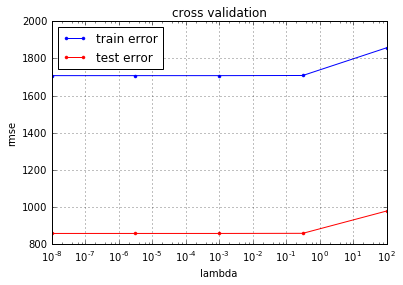

In [39]:
def cross_validation_demo(seed, initial_w, alpha, max_iter, degree,k_fold,lambdas):
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    print(k_indices.shape)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    rmse_te_var=[]

    # cross validation: TODO
    print(y.shape)
    print(new_tX.shape)
    
    for lambda_ in lambdas:
        loss_tr, loss_te, rmses_test = cross_validation(y, new_tX, initial_w1, alpha, max_iter, k_indices, k_fold, lambda_, degree)
        rmse_tr.append(loss_tr)
        rmse_te.append(loss_te)
        rmse_te_var.append(rmses_test)
    
    # ***************************************************    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    
     # Create a figure instance
    #fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    #ax = fig.add_subplot(111)

    # Create the boxplot
    #bp = ax.boxplot(rmse_te_var)

cross_validation_demo(2000, initial_w1, alpha, max_iter, 1, 3, np.logspace(-8, 2, 5))

## Do your thing crazy machine learning thing here :) ...

## Generate predictions and save ouput in csv format for submission:

In [14]:
DATA_TEST_PATH = 'test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

Pour la méthode 2:

In [31]:
mean_tX_test, mean_mean, mean__std = standardize(undefToMeanMean(tX_test), mean_x=None, std_x=None)

Pour la méthode 3:

In [15]:
dup_tX_test,dup_mean, dup_std = standardize(build_poly(undefToMeanMean(tX_test),3), mean_x=None, std_x=None)

In [16]:
dup_tX_test.shape

(568238, 91)

In [19]:
OUTPUT_PATH = 'dup_tX_newton.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w, dup_tX_test, logistic= True)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [32]:
np.dot(mean_tX_test, reg_w)

array([[-4.20967426],
       [-2.57229167],
       [-1.42675124],
       ..., 
       [-0.25694514],
       [-0.02774611],
       [-2.87362728]])